# 4 - Data Augmentation

This is the fourth notebook of the project where we will perform our data augmentation in order to increase the number of images we have. Basically we are going to double the amount of images that we have in train and test new folders creating an identical copy. That identical copy will be a reflection of the original one flipping it across the Y axis and save it as a new file. An explanation of the data augmentation with an example can be found [here](./data/notebooks/data_augmentation_playground.ipynb).

In this notebook, we will:

- Copy all train and test images to a new folder in order to perform data augmentation in a separate environment
- Perform Data Augmentation by creating a reflection of each single image
- Creating a new row for the new image and add it to the corresponding dataset (train or test)

In [1]:
# To move or copy folders
from utils.data_engineering import move_files
from utils.data_engineering import flip_image
from utils.data_engineering import augment_data
from utils.data_engineering import extract_id_from_path

import glob
import os
from PIL import Image

# To visualize images
from utils.data_eda_viz_preprocessing import visualize_random_image
from utils.data_eda_viz_preprocessing import visualize_many
from utils.data_eda_viz_preprocessing import visualize_single_bbox
from utils.data_eda_viz_preprocessing import visualize_bb_with_data
from utils.data_eda_viz_preprocessing import load_csv_as_dataset
import matplotlib.pyplot as plt

# Data manipulation and viz
import pandas as pd

## Creating a new folder for Data Augmentation

First of all, we are going to copy all train and test images into a new folder in order to perform our data augmentation in a separate environment. This would allow us to keep the original images in case we need them to another task or a [different type of augmentation.](https://pub.towardsai.net/maximizing-the-impact-of-data-augmentation-effective-techniques-and-best-practices-c4cad9cd16e4)

In [2]:
# First we will copy train images
path_train = "airplanes/images/train"
new_folder_train = "airplane_detection/images/airplanes/images/train"

move_files(path_train, new_folder_train, "copy")

Action Copy: 773 files from airplanes/images/train to airplane_detection/images/airplanes/images/train


In [3]:
# Secondly we will copy test images
path_test = "airplanes/images/test"
new_folder_test = "airplane_detection/images/airplanes/images/test"

move_files(path_test, new_folder_test, "copy")

Action Copy: 260 files from airplanes/images/test to airplane_detection/images/airplanes/images/test


## Data Exploration

Performing Data Augmentation will consist in creating a reflection across the Y axis of each images and creating the new coordenates of this image in order to add it to our datasets. First of all, we are going to count the shape of our train and test datasets and the number of images we have in our recently created train and test folderds

In [4]:
train_df = pd.read_csv("data/processed_csv/train.csv", dtype={"className": str})
test_df = pd.read_csv("data/processed_csv/test.csv", dtype={"className": str})

# Shape of datasets
train_df.shape, test_df.shape

((1352, 8), (338, 8))

In [5]:
train_df.className = train_df.className.astype(str)
train_df.head(2)

,header_cols,label_width,className,XMin,YMin,XMax,YMax,ImagePath
0,2,5,0.000,0.537500,0.347092,0.998750,0.574109,airplanes/images/train/0644da39dd206abc.jpg
1,2,5,0.000,0.286875,0.628385,0.336875,0.652661,airplanes/images/train/01f0114cacd689a3.jpg


In [6]:
test_df.head(2)

,header_cols,label_width,className,XMin,YMin,XMax,YMax,ImagePath
0,2,5,0.000,0.444653,0.493125,0.546904,0.585000,airplanes/images/test/0289cd0483d2f758.jpg
1,2,5,0.000,0.553125,0.487395,0.632500,0.612512,airplanes/images/test/094d697dbc53a9f2.jpg


In [7]:
# Count number of pictures in train folder before augmentation
train_images_pth = "airplane_detection/images/airplanes/images/train/*.jpg"

folder = glob.glob(train_images_pth)
len(folder)

773

In [8]:
# Count number of pictures in test folder before augmentation

test_images_pth = "airplane_detection/images/airplanes/images/test/*.jpg"

folder = glob.glob(test_images_pth)
len(folder)

260

Before performing the augmentation, we can count:

**TRAIN:**

- 773 images in our train folder
- 1352 rows in our train dataset

**TEST:**

- 260 images in our test folder
- 338 rows in our test folder

### Performing Data Augmentation

To perform our planned Data Augmentation we will use a crafted function <code>augment_data</code> that will perform:

- Data Augmentation consisting in creating a reflected copy of each image across the Y axis.
- Creating a new csv dataset with the existing images and the new ones, adding the new coordinates of the new images
- Creating a lst file that will be saved in an specific folder. This file will be used to train the model

#### Train Data Augmentation

In [9]:
images_path = 'airplane_detection/images/airplanes/images/train'
output_file = 'train_augmented.lst'

augment_data(images_path, train_df, output_file)

Original DataFrame length: 1352
Augmented DataFrame length: 1352
Merged DataFrame length: 2704


#### Test Data Augmentation

In [10]:
images_path = 'airplane_detection/images/airplanes/images/test/'
output_file = 'test_augmented.lst'

augment_data(images_path, test_df, output_file)

Original DataFrame length: 338
Augmented DataFrame length: 338
Merged DataFrame length: 676


### Counting 

As we see, after out Data Augmentation, we doubled the amount of images and rows in our train - test folders and datasets. Let's check the new csv created:

**Train Dataset**

In [11]:
new_train_df = pd.read_csv("data/augmented_csv/train_augmented.lst.csv")

# Check first rows
new_train_df.head()

,Unnamed: 0,header_cols,label_width,className,XMin,YMin,XMax,YMax,ImagePath
0,0,2,5,0.0,0.537500,0.347092,0.998750,0.574109,airplanes/images/train/0644da39dd206abc.jpg
1,1,2,5,0.0,0.286875,0.628385,0.336875,0.652661,airplanes/images/train/01f0114cacd689a3.jpg
2,2,2,5,0.0,0.820000,0.116829,0.876250,0.239221,airplanes/images/train/022c552b3553e7d7.jpg
3,3,2,5,0.0,0.428750,0.345833,0.839375,0.611667,airplanes/images/train/00e4eb575f904b0e.jpg
4,4,2,5,0.0,0.009766,0.177160,0.986328,0.686676,airplanes/images/train/06f93f6c268d65e4.jpg


In [12]:
# Check the tail to see some augmented images
new_train_df.tail()

,Unnamed: 0,header_cols,label_width,className,XMin,YMin,XMax,YMax,ImagePath
2699,2699,2,5,0.0,0.980000,0.195122,0.206875,0.515009,airplanes/images/train/aug_039d5619c2cab697.jpg
2700,2700,2,5,0.0,0.245625,0.218456,0.031875,0.308851,airplanes/images/train/aug_05420c565ce63b52.jpg
2701,2701,2,5,0.0,1.000000,0.398693,0.001634,0.998366,airplanes/images/train/aug_0202faf23a9aae11.jpg
2702,2702,2,5,0.0,1.000000,0.000000,0.032500,0.945833,airplanes/images/train/aug_06b2fa976acd7aa9.jpg
2703,2703,2,5,0.0,0.641250,0.654564,0.331250,0.807054,airplanes/images/train/aug_039226686e98d082.jpg


**Test Dataset**

In [13]:
new_test_df = pd.read_csv("data/augmented_csv/test_augmented.lst.csv")

# Check first rows
new_test_df.head()

,Unnamed: 0,header_cols,label_width,className,XMin,YMin,XMax,YMax,ImagePath
0,0,2,5,0.0,0.444653,0.493125,0.546904,0.585000,airplanes/images/test/0289cd0483d2f758.jpg
1,1,2,5,0.0,0.553125,0.487395,0.632500,0.612512,airplanes/images/test/094d697dbc53a9f2.jpg
2,2,2,5,0.0,0.240069,0.327869,0.678756,0.626734,airplanes/images/test/05cbc0a6edf36d7d.jpg
3,3,2,5,0.0,0.126875,0.246255,0.999375,0.813670,airplanes/images/test/03f4e6976b980fa6.jpg
4,4,2,5,0.0,0.094375,0.362500,0.905625,0.684167,airplanes/images/test/07728d256e7eec1c.jpg


In [14]:
# Check the tail to see some augmented images
new_test_df.tail()

,Unnamed: 0,header_cols,label_width,className,XMin,YMin,XMax,YMax,ImagePath
671,671,2,5,0.0,0.906250,0.040000,0.092500,0.855000,airplanes/images/test/aug_074628835813833b.jpg
672,672,2,5,0.0,0.293125,0.537500,0.000625,0.711667,airplanes/images/test/aug_01326fde55e1df2c.jpg
673,673,2,5,0.0,0.892265,0.111875,0.298343,0.696250,airplanes/images/test/aug_048a9eaad1d028a8.jpg
674,674,2,5,0.0,0.869375,0.206897,0.487500,0.521691,airplanes/images/test/aug_0276b1334bbdbcbb.jpg
675,675,2,5,0.0,1.000000,0.161176,0.461875,0.992941,airplanes/images/test/aug_02ed610339f8366c.jpg


**Shapes of Datasets**

In [15]:
new_train_df.shape, new_test_df.shape

((2704, 9), (676, 9))

**Counting Images**

In [16]:
# Count number of pictures in train folder after augmentation
train_images_pth = "airplane_detection/images/airplanes/images/train/*.jpg"

folder = glob.glob(train_images_pth)
len(folder)

1546

In [17]:
# Count number of pictures in test folder after augmentation
test_images_pth = "airplane_detection/images/airplanes/images/test/*.jpg"

folder = glob.glob(test_images_pth)
len(folder)

520

#### Display an image an its augmented.

In [18]:
base_path = 'airplane_detection/images/'  

test_augmented = new_train_df[new_train_df.ImagePath.str.contains("0011fb9e51e89811.jpg")]
test_augmented

,Unnamed: 0,header_cols,label_width,className,XMin,YMin,XMax,YMax,ImagePath
454,454,2,5,0.0,0.000000,0.436210,0.759375,0.999062,airplanes/images/train/0011fb9e51e89811.jpg
504,504,2,5,0.0,0.139375,0.401501,0.978750,0.901501,airplanes/images/train/0011fb9e51e89811.jpg
1806,1806,2,5,0.0,1.000000,0.436210,0.240625,0.999062,airplanes/images/train/aug_0011fb9e51e89811.jpg
1856,1856,2,5,0.0,0.860625,0.401501,0.021250,0.901501,airplanes/images/train/aug_0011fb9e51e89811.jpg


**As we see, we have an image that appears 4 times in our dataset. That means our image has 2 bounding boxes. Let's display all images in order to check that our Data Augmentation worked**

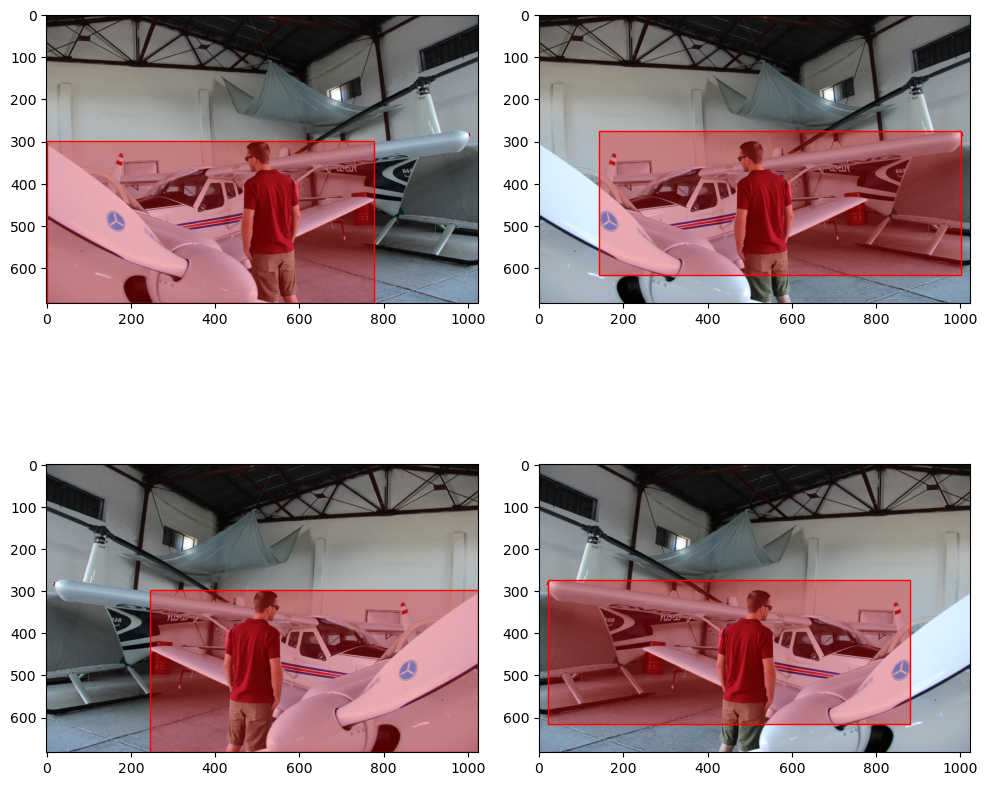

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for ax, (index, row) in zip(axs.flatten(), test_augmented.iterrows()):
    image_path = os.path.join(base_path, row['ImagePath'])
    img = Image.open(image_path)
    
    width, height = img.size
    xmin = row['XMin'] * width
    xmax = row['XMax'] * width
    ymin = row['YMin'] * height
    ymax = row['YMax'] * height
    
    ax.imshow(img)
    rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor=(1, 0, 0, 0.3))
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

## <center>Summary</center>

| Dataset | Condition       | Images in Folder | Rows in Dataset |
|---------|-----------------|------------------|-----------------|
| TRAIN   | Before Augment  | 773              | 1352            |
| TRAIN   | After Augment   | 1546             | 2704            |
| TEST    | Before Augment  | 260              | 338             |
| TEST    | After Augment   | 520              | 676             |

**We successfully augmented our dataset to enhance our model’s learning capability. Initially, we had 773 training and 260 test images, which, after augmentation, expanded to 1546 and 520 respectively. Each augmented image is a horizontal flip of the original, with a unique naming convention “aug_{id of the original}.” This enlargement in our dataset is pivotal for improving model generalization.**